In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [43]:
memops = {'scal':2, 'axpby':3, 'pointwiseDot':6, 'dot':2, 'dx':3, 'dy':3,
         'arakawa':34, 'cg':42}

In [84]:
#read in csv file
df1 = pd.read_csv('benchmark_skl_ampi1.csv', delimiter=' ')
#get rid of non-relevant columns
df1_measure = df1[['n','Nx','Ny']+list(memops.keys())]
#compute show mean and standard derivation of 'same' groups 
dfr=df1_measure.groupby(['n', 'Nx','Ny']).agg(['mean', 'std'])
dfr=dfr.reset_index(level=['n','Nx','Ny'])
dfr

n    Nx    Ny        dx             arakawa               axpby            \
                       mean       std      mean       std      mean       std   
0   2   256   256  4.46e-05  2.18e-05  2.98e-04  4.22e-06  1.14e-05  1.52e-05   
1   2   512   512  2.95e-04  3.26e-06  8.42e-04  4.27e-06  4.78e-05  1.13e-06   
2   2  1024  1024  1.18e-03  5.24e-05  5.32e-03  4.13e-05  2.16e-04  7.09e-06   
3   2  2048  2048  2.47e-03  1.13e-03  2.40e-02  4.36e-04  1.69e-03  4.82e-05   
4   3   256   256  9.08e-05  1.37e-05  6.39e-04  2.13e-06  8.39e-06  1.01e-06   
5   3   512   512  7.22e-04  1.13e-06  2.89e-03  6.17e-05  1.05e-04  1.87e-06   
6   3  1024  1024  1.48e-03  5.66e-05  1.61e-02  6.00e-04  6.58e-04  6.26e-05   
7   3  2048  2048  6.34e-03  2.52e-03  6.44e-02  3.66e-03  4.23e-03  4.01e-05   
8   4   256   256  3.54e-04  1.94e-05  1.43e-03  1.13e-05  4.88e-05  3.57e-06   
9   4   512   512  1.38e-03  3.76e-06  7.48e-03  7.37e-05  2.15e-04  5.37e-06   
10  4  1024  1024  2.80e-03  6.27e-05  3.25e-02  1.18e-03  1.71e-03  5.97e-05   
11  4  2048  2048  1.10e-02  7.80e-05  1.34e-01  6.62e-03  7.80e-03  1.19e-04   
12  5   256   256  3.17e-04  2.31e-05  2.60e-03  6.94e-05  1.68e-05  1.51e-06   
13  5   512   512  2.38e-03  1.23e-05  1.40e-02  5.21e-05  3.19e-04  2.36e-05   
14  5  1024  1024  5.23e-03  3.08e-05  5.89e-02  3.15e-04  2.79e-03  5.47e-05   
15  5  2048  2048  2.08e-02  1.14e-04  2.50e-01  6.29e-03  1.23e-02  1.10e-04   

   pointwiseDot                scal                  dy                  cg  \
           mean       std      mean       std      mean       std      mean   
0      8.37e-06  2.74e-07  5.05e-06  2.87e-06  8.11e-05  3.58e-06  4.54e-04   
1      6.67e-05  4.44e-07  6.64e-06  1.47e-07  1.90e-04  8.35e-06  1.32e-03   
2      6.44e-04  1.12e-05  3.10e-05  3.70e-06  6.38e-04  1.95e-05  6.46e-03   
3      3.77e-03  4.48e-05  6.27e-04  6.34e-05  2.17e-03  2.49e-04  2.90e-02   
4      1.41e-05  4.06e-07  4.91e-06  1.86e-07  1.48e-04  1.66e-06  1.05e-03   
5      1.85e-04  1.39e-05  1.13e-05  1.07e-07  4.94e-04  4.55e-06  3.78e-03   
6      1.94e-03  4.56e-05  1.67e-04  5.47e-05  1.73e-03  9.57e-05  1.82e-02   
7      9.03e-03  7.83e-05  2.71e-03  6.17e-05  6.45e-03  4.99e-04  7.32e-02   
8      6.72e-05  1.08e-06  6.58e-06  1.09e-07  3.45e-04  7.82e-06  1.85e-03   
9      6.58e-04  1.59e-05  2.93e-05  9.55e-07  1.09e-03  1.30e-05  8.77e-03   
10     3.74e-03  1.75e-05  6.35e-04  4.07e-05  4.24e-03  4.50e-05  3.72e-02   
11     1.57e-02  3.43e-05  5.37e-03  7.29e-05  1.69e-02  1.56e-04  1.52e-01   
12     9.05e-05  5.43e-06  8.75e-06  2.34e-07  4.99e-04  2.79e-06  3.01e-03   
13     1.24e-03  1.86e-05  6.80e-05  2.08e-05  2.13e-03  1.98e-05  1.61e-02   
14     6.00e-03  7.52e-05  1.60e-03  4.14e-05  8.49e-03  4.90e-05  6.67e-02   
15     2.46e-02  6.93e-05  8.76e-03  1.56e-04  3.76e-02  2.99e-04  2.80e-01   

                   dot            
         std      mean       std  
0   1.02e-05  4.25e-05  1.22e-05  
1   1.26e-05  1.10e-04  5.95e-06  
2   2.49e-04  3.84e-04  1.37e-05  
3   3.45e-04  1.43e-03  4.10e-05  
4   4.03e-05  7.00e-05  5.78e-06  
5   3.57e-05  2.16e-04  1.02e-05  
6   6.53e-05  8.32e-04  1.75e-05  
7   3.51e-04  3.13e-03  6.24e-05  
8   1.13e-05  1.07e-04  1.62e-06  
9   2.95e-04  3.71e-04  1.28e-05  
10  2.43e-04  1.41e-03  4.38e-05  
11  5.85e-04  5.53e-03  1.95e-04  
12  2.37e-05  1.98e-04  2.63e-05  
13  7.02e-05  5.78e-04  1.88e-05  
14  2.98e-04  2.24e-03  6.75e-05  
15  9.71e-04  8.65e-03  2.72e-04

In [85]:
#insert size in GBytes
dfr.insert(0,'size', 8*dfr['n']*dfr['n']*dfr['Nx']*dfr['Ny']/1e6)
#insert bandwidth columns= multiply size by memops / time
for name, mem in memops.items():
    dfr[(name,'bw')] = dfr['size']/1000*mem/dfr[(name,'mean')]
for name, mem in memops.items():
    dfr[(name,'eff')]= dfr[(name,'bw')]/dfr[('axpby','bw')].iloc[15]
#now display all bandwidth results

In [86]:
cols=[(m,'eff') for m in memops.keys()]
efficiency=dfr[['n','Nx','Ny','size']].join( dfr[cols])
cols=[(m,'bw') for m in memops.keys()]
efficiency=efficiency.join( dfr[cols])
#dfr=dfr.sort_values(by='size')
#efficiency=efficiency.set_index('size')

In [87]:
pd.set_option('precision',2)
efficiency

,n,Nx,Ny,size,dx,arakawa,axpby,pointwiseDot,scal,dy,cg,dot,dx,arakawa,axpby,pointwiseDot,scal,dy,cg,dot
,,,,,eff,eff,eff,eff,eff,eff,eff,eff,bw,bw,bw,bw,bw,bw,bw,bw
0,2,256,256,2.10,0.69,1.17,2.71,7.38,4.07,0.38,0.95,0.48,141.22,239.22,551.61,1504.12,830.17,77.56,194.20,98.64
1,2,512,512,8.39,0.42,1.66,2.58,3.70,12.40,0.65,1.31,0.75,85.19,338.93,526.47,754.52,2527.89,132.15,267.60,152.60
2,2,1024,1024,33.55,0.42,1.05,2.29,1.53,10.63,0.77,1.07,0.86,85.52,214.51,466.55,312.46,2167.89,157.77,218.11,174.61
3,2,2048,2048,134.22,0.80,0.93,1.17,1.05,2.10,0.91,0.95,0.92,162.97,189.79,237.81,213.69,427.80,185.95,194.67,188.24
4,3,256,256,4.72,0.76,1.23,8.27,9.82,9.42,0.47,0.93,0.66,155.86,251.15,1686.89,2002.82,1920.17,95.90,189.28,134.88
5,3,512,512,18.87,0.38,1.09,2.65,3.00,16.43,0.56,1.03,0.86,78.47,221.72,539.79,610.85,3350.89,114.66,209.96,174.98
6,3,1024,1024,75.50,0.75,0.78,1.69,1.15,4.43,0.64,0.86,0.89,152.93,159.69,344.39,233.75,903.77,130.75,174.70,181.53
7,3,2048,2048,301.99,0.70,0.78,1.05,0.98,1.09,0.69,0.85,0.95,142.82,159.32,214.35,200.63,223.23,140.51,173.27,193.12
8,4,256,256,8.39,0.35,0.98,2.53,3.67,12.50,0.36,0.94,0.77,71.13,198.92,515.81,749.35,2549.59,72.92,190.69,156.67


(4, 2400)

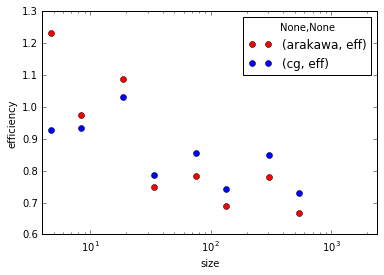

In [88]:
plt.figure
efficiency.iloc[4:12].plot(x=('size',''),y=[('arakawa','eff'),('cg','eff')],style=['ro','bo'],logx=True)
plt.ylabel('efficiency')
plt.xlabel('size')
plt.xlim(4,2400)

In [83]:
efficiency.iloc[4:12]

,n,Nx,Ny,size,dx,arakawa,axpby,pointwiseDot,scal,dy,cg,dot,dx,arakawa,axpby,pointwiseDot,scal,dy,cg,dot
,,,,,eff,eff,eff,eff,eff,eff,eff,eff,bw,bw,bw,bw,bw,bw,bw,bw
4,3,256,256,4.72,0.25,0.50,1.81,4.73,1.79,0.26,0.37,0.18,220.23,443.44,1593.71,4162.04,1575.54,228.69,327.91,159.97
5,3,512,512,18.87,0.54,0.90,6.64,8.50,8.37,0.46,0.73,0.49,471.27,793.73,5839.12,7478.03,7365.20,408.39,641.13,427.90
6,3,1024,1024,75.50,0.33,0.94,2.42,2.67,14.69,0.55,0.86,0.68,293.14,822.62,2131.12,2346.46,12920.92,488.08,760.74,599.58
7,3,2048,2048,301.99,0.58,0.68,1.46,1.05,3.17,0.55,0.74,0.73,507.52,596.11,1287.72,927.24,2784.86,487.54,652.33,646.53
8,4,256,256,8.39,0.30,0.55,3.30,6.36,4.51,0.24,0.46,0.32,263.53,485.24,2905.24,5596.22,3964.44,210.57,405.45,283.96
9,4,512,512,33.55,0.29,0.80,2.34,3.36,11.20,0.36,0.73,0.56,253.26,706.61,2058.97,2952.82,9857.29,313.67,644.33,496.82
10,4,1024,1024,134.22,0.32,0.66,2.07,1.36,7.22,0.41,0.70,0.73,278.50,584.28,1822.19,1196.70,6351.97,364.91,612.86,646.21
11,4,2048,2048,536.87,0.60,0.62,1.04,0.97,1.83,0.42,0.66,0.75,524.15,541.96,916.61,850.38,1609.91,365.34,578.94,663.47
